In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [ ]:
df.head(20)

In [6]:
df.shape

(101766, 50)

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [91]:
#create a simpler dataframe with only columns that may be of interest.

df2=df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'time_in_hospital', 'number_inpatient', 'readmitted']]

In [ ]:
df2.head(10)

In [90]:
df2['admission_type_id'].value_counts() #1=Emergency, 2=Urgent, 3=Elective in the order of most frequent type of visit

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [22]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [118]:
#drop weight column as most of the data is "?"

df2=df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'time_in_hospital', 'number_inpatient', 'readmitted']]

In [100]:
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,time_in_hospital,number_inpatient,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,1,0,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,3,0,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,2,1,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,2,0,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,1,0,NO
5,35754,82637451,Caucasian,Male,[50-60),Urgent,3,0,>30
6,55842,84259809,Caucasian,Male,[60-70),Elective,4,0,NO
7,63768,114882984,Caucasian,Male,[70-80),Emergency,5,0,>30
8,12522,48330783,Caucasian,Female,[80-90),Urgent,13,0,NO
9,15738,63555939,Caucasian,Female,[90-100),Elective,12,0,NO


In [101]:
df2['admission_type_id'].value_counts()

Emergency    53990
Elective     18869
Urgent       18480
6             5291
5             4785
8              320
7               21
4               10
Name: admission_type_id, dtype: int64

In [119]:
#Renaming the admission type ids

df2['admission_type_id'] = df2['admission_type_id'].replace([1, 2, 3, 4, 5, 6, 7, 8], ["Emergency", "Urgent", "Elective", "No", "No", "No",
                                                                                       "No", "No"])

<ipython-input-119-6860aa4748b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['admission_type_id'] = df2['admission_type_id'].replace([1, 2, 3, 4, 5, 6, 7, 8], ["Emergency", "Urgent", "Elective", "No", "No", "No",


In [142]:
#droping rows to only keep emergency, elective and urgent admission types

df2 = df2[df2['admission_type_id'] != "No"]

In [143]:
df2['admission_type_id'].value_counts()

Emergency    53990
Elective     18869
Urgent       18480
Name: admission_type_id, dtype: int64

In [159]:
#Dropping rows with "No" in the readmitted column

df2 = df2[df2['readmitted'] != "NO"]

In [160]:
df2['readmitted'].value_counts()

>30    31507
<30    10248
Name: readmitted, dtype: int64

In [ ]:
#dataframe with only one visit per patient. Their most recent visit = max encounter id

In [132]:
df2['patient_nbr'].value_counts() #Evidence that patient_nbr are repeated in the column.

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [162]:
df_max = df2.sort_values(["patient_nbr", "encounter_id"]).drop_duplicates("patient_nbr", keep="last")


In [134]:
df_max['patient_nbr'].value_counts() #Evidence that duplicates were removed

135          1
76749264     1
76756698     1
76755330     1
76753782     1
            ..
27639783     1
27639792     1
27641889     1
27645615     1
189502619    1
Name: patient_nbr, Length: 71518, dtype: int64

In [ ]:
#Compare admission type and frequency of readmissions

<Axes: xlabel='admission_type_id'>

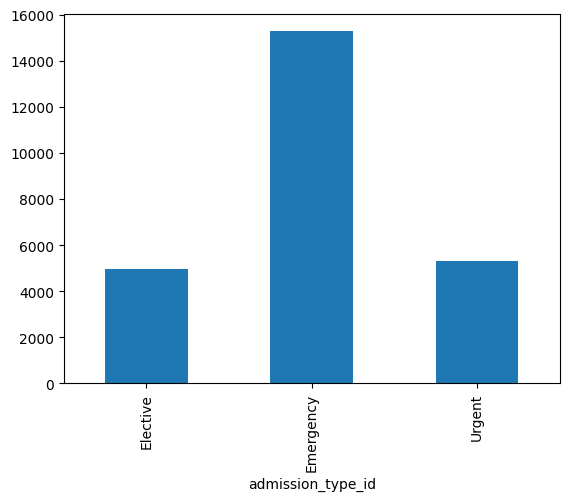

In [163]:
#frequency of admission types
df_max.groupby(['admission_type_id']) ['patient_nbr'].nunique('patient_nbr').plot(kind='bar')

<Axes: xlabel='readmitted'>

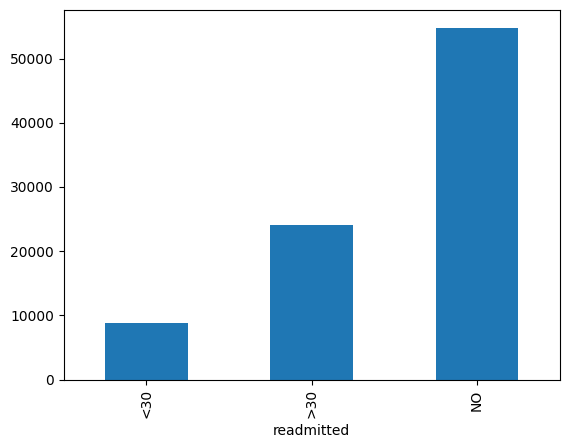

In [167]:
#frequency of admission types
df.groupby(['readmitted'])['patient_nbr'].nunique('patient_nbr').plot(kind='bar')

<Axes: xlabel='readmitted', ylabel='count'>

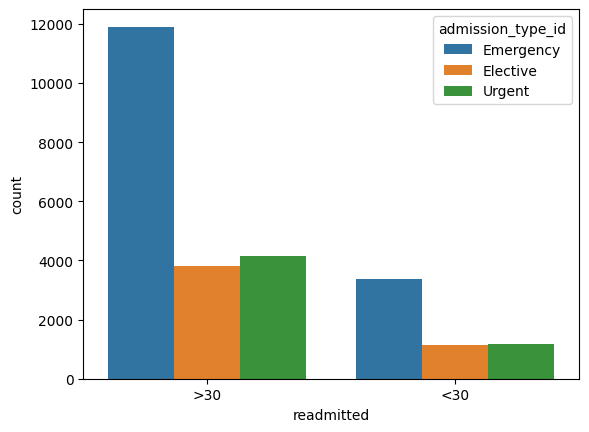

In [165]:
sns.countplot(data=df_max, x="readmitted", hue="admission_type_id")


Based on the data presented, it appears that the majority of admissions are made either through the emergency room or emergency services. However, regardless of the type of admission, most patients were not readmitted. It is worth noting, however, that the majority of readmissions occur when the initial admission was made through emergency services, regardless of whether the readmission was within 30 days or more.